<a href="https://colab.research.google.com/github/akashkumar181/Data_cleaning/blob/main/Raw_Data_Cleaning2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You are given a dataset in CSV format, "sales_data.csv", which contains information about a retail store's monthly sales.
 Your task is to clean, analyze, and visualize the data using Pandas, NumPy, and Matplotlib.
Tasks:
Data Cleaning:
Load the dataset using Pandas and display the first few rows.

Check for missing or null values and handle them appropriately.

Correct any incorrect values in the Total Sales column by recalculating it using Price * Quantity Sold.

Ensure Customer Rating values are within the range of 1 to 5. If not, replace them with the median rating.

Data Analysis:
Find the top 5 products with the highest total sales.

Identify the product category that generated the highest revenue.

Calculate the average discount applied per category.

Determine the month with the highest sales revenue.
Data Visualization:
Create a bar chart showing total sales for each product category.

Generate a time series line plot of total sales over time.

Plot a histogram of customer ratings to analyze the distribution.

Create a scatter plot comparing Discount Applied and Total Sales to see if discounts impact revenue.

Bonus Task: Perform any additional insights or visualizations that might be useful for understanding the sales data trends.

In [18]:
import pandas as pd

In [4]:
data=pd.read_csv("/content/sales_data (1).csv")
data

,Date,Product,Category,Price,Quantity Sold,Total Sales,Discount Applied,Customer Rating
0,16-01-2023,Headphones,Electronics,112,2,224.0,0.0,5
1,13-03-2023,Sunglasses,Home Essentials,445,4,1780.0,5.0,3
2,17-03-2023,Laptop,Electronics,870,8,6960.0,0.0,6
3,24-01-2023,Watch,Home Essentials,280,7,1960.0,0.0,6
4,28-01-2023,Headphones,Clothing,116,9,1044.0,0.0,5
...,...,...,...,...,...,...,...,...
95,03-01-2023,Laptop,Electronics,831,3,2493.0,NaN,3
96,19-02-2023,Watch,Home Essentials,486,1,486.0,NaN,3
97,12-01-2023,Blender,Accessories,712,5,NaN,NaN,2
98,06-03-2023,Sunglasses,Electronics,411,1,411.0,0.0,3


In [5]:
data.isna().sum()

,0
Date,0
Product,0
Category,0
Price,0
Quantity Sold,0
Total Sales,10
Discount Applied,9
Customer Rating,0


In [6]:
data.isna().sum()

,0
Date,0
Product,0
Category,0
Price,0
Quantity Sold,0
Total Sales,10
Discount Applied,9
Customer Rating,0


In [9]:
data['Total Sales']=data['Total Sales'].fillna(data['Price']*data['Quantity Sold'])
data['Discount Applied']=data['Discount Applied'].fillna(0)
orginalSalePrice=data['Price']*data['Quantity Sold']
data['Total Sales']=data['Total Sales'].replace(orginalSalePrice)
data['Customer Rating']=data['Customer Rating'].replace(data['Customer Rating'].mean())
top_five_products=data[["Product","Total Sales"]].nlargest(5,"Total Sales")
print(top_five_products)
ProductHighestRevenue=data.groupby("Product")["Total Sales"].sum().nlargest(1)
print(ProductHighestRevenue)
Discountapplid=data.groupby("Category")["Discount Applied"].mean()
print("AvgDiscount",Discountapplid)



data


       Product  Total Sales
50  Smartphone       8703.0
73      Laptop       8163.0
88     T-shirt       7929.0
81    Backpack       7065.0
2       Laptop       6960.0
Product
T-shirt    51034.0
Name: Total Sales, dtype: float64
AvgDiscount Category
Accessories        3.958333
Clothing           3.275862
Electronics        2.954545
Home Essentials    2.000000
Name: Discount Applied, dtype: float64


<ipython-input-9-6f2a634029bc>:5: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  data['Customer Rating']=data['Customer Rating'].replace(data['Customer Rating'].mean())


,Date,Product,Category,Price,Quantity Sold,Total Sales,Discount Applied,Customer Rating
0,16-01-2023,Headphones,Electronics,112,2,224.0,0.0,5
1,13-03-2023,Sunglasses,Home Essentials,445,4,1780.0,5.0,3
2,17-03-2023,Laptop,Electronics,870,8,6960.0,0.0,6
3,24-01-2023,Watch,Home Essentials,280,7,1960.0,0.0,6
4,28-01-2023,Headphones,Clothing,116,9,1044.0,0.0,5
...,...,...,...,...,...,...,...,...
95,03-01-2023,Laptop,Electronics,831,3,2493.0,0.0,3
96,19-02-2023,Watch,Home Essentials,486,1,486.0,0.0,3
97,12-01-2023,Blender,Accessories,712,5,3560.0,0.0,2
98,06-03-2023,Sunglasses,Electronics,411,1,411.0,0.0,3


In [22]:
import calendar
data["Date"]=pd.to_datetime(data["Date"])
data["month"]=data["Date"].dt.month
data["month"]=data["month"].apply(lambda x:calendar.month_name[x])
mathonlysalesrev=data.groupby("month")["Total Sales"].sum()
mathonlysalesrev

,Total Sales
month,
April,27131.0
February,82909.0
January,79567.0
March,79453.0


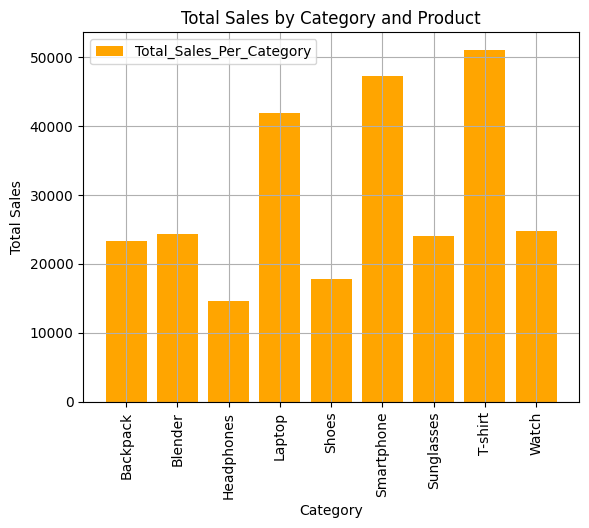

In [61]:
import matplotlib.pyplot as plt
x=data.groupby("Product")["Total Sales"].sum()
plt.bar(x.index,x.values,label="Total_Sales_Per_Category",color='orange')
plt.xticks(rotation=90)

plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.title('Total Sales by Category and Product')
plt.legend()
plt.grid()
plt.show()

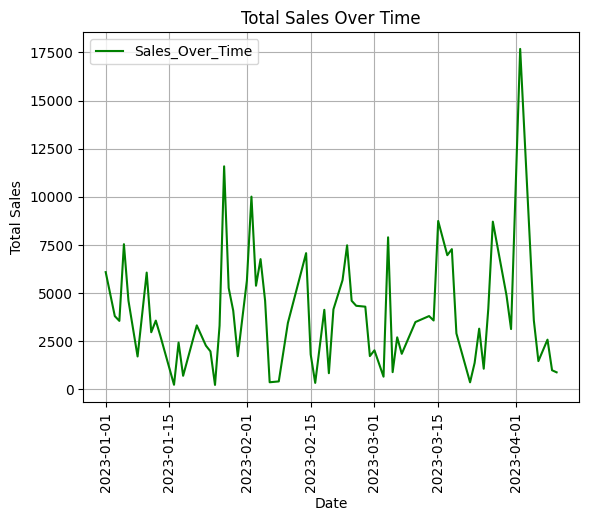

In [44]:
x=data.groupby("Date")["Total Sales"].sum()
x
plt.plot(x.index,x.values,label="Sales_Over_Time",color="green")
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales Over Time')
plt.legend()
plt.grid()
plt.show()


Text(0.5, 1.0, 'Distribution of Customer Ratings')

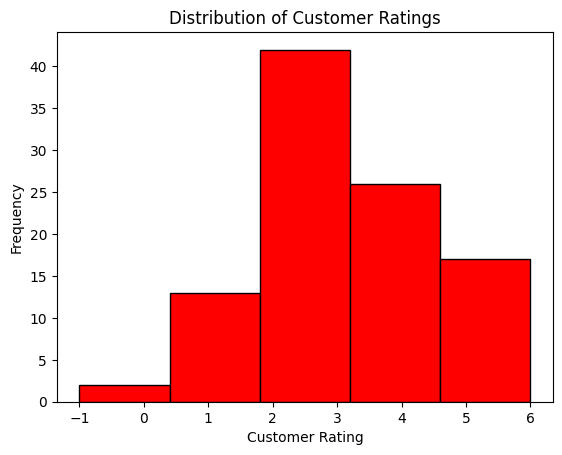

In [49]:
plt.hist(data['Customer Rating'],bins=5,edgecolor='black',color='red')
plt.xlabel('Customer Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Ratings')

Text(0.5, 1.0, 'Relationship between Discount Applied and Total Sales')

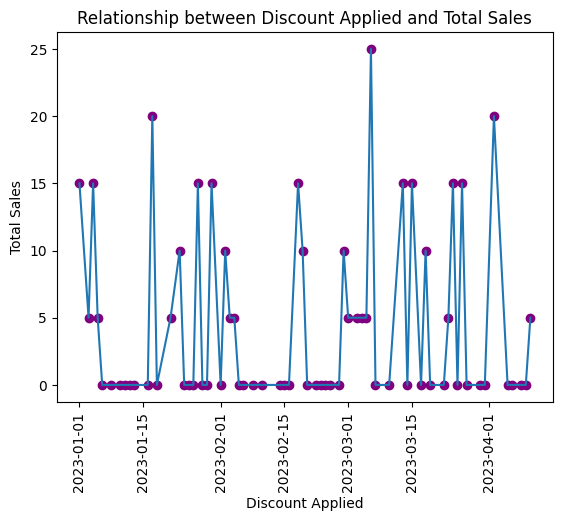

In [59]:
x=data.groupby("Date")['Discount Applied'].sum()

plt.scatter(x.index,x.values,color='purple')
plt.plot(x.index,x.values)

plt.xlabel('Discount Applied')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.title('Relationship between Discount Applied and Total Sales')